<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Decision Tree Classifier to Predict Whether a Customer will Purchase a Product or Service based on their Demographic and Behavioral Data</strong></h1>
</div>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Import Necessary Libraries</strong></h1>
</div>

In [47]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import plotly as py 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong> Importing the Dataset of Banking+Market</strong></h1>
</div>


In [12]:
file_path = (r"F:\Experiences\01-Prodigy InfoTech-DS-Internship\Data Sets\Task-03- Decsion-Tree-Classifier-Bank+Marketing\bank\bank.csv")
df =pd.read_csv(file_path, delimiter=";")

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Explore the Basics of The Dataset</strong></h1>
</div>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [14]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [15]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [16]:
row, col =df.shape
print(f'Number of rows in Dataset: {row} and Number of Columns: {col}' )

Number of rows in Dataset: 4521 and Number of Columns: 17


In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [19]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
978,34,entrepreneur,divorced,tertiary,no,262,no,no,cellular,20,nov,371,1,-1,0,unknown,no
2827,49,services,married,secondary,no,320,no,no,telephone,9,feb,1971,4,-1,0,unknown,yes
3839,51,technician,divorced,secondary,no,2323,yes,yes,cellular,18,aug,151,10,-1,0,unknown,no
4410,36,unemployed,married,secondary,no,-35,no,no,cellular,30,jan,339,3,-1,0,unknown,no
3432,26,blue-collar,married,secondary,no,2770,yes,no,unknown,8,may,141,1,-1,0,unknown,no


In [20]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [21]:
df.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [22]:
df.default.unique()

array(['no', 'yes'], dtype=object)

In [23]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Univarient Analysis</strong></h1>
</div>

In [24]:
print(f'There are following distribution of the Target Variable\n {df.y.value_counts()}')

There are following distribution of the Target Variable
 y
no     4000
yes     521
Name: count, dtype: int64


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Study Conclusion</strong></h1>
</div>
<h3> The Dataset is Unbalance Because its has the Number of instances for Class Lable 'no' = 4000, and Class Lable 'yes' = 521. Its shows that dataset is unbalance</h3>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Finding the Duplicate in The Dataset</strong></h1>
</div>

In [25]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Finding Outlier in the dataset</strong></h1>
</div>

<Axes: xlabel='balance', ylabel='job'>

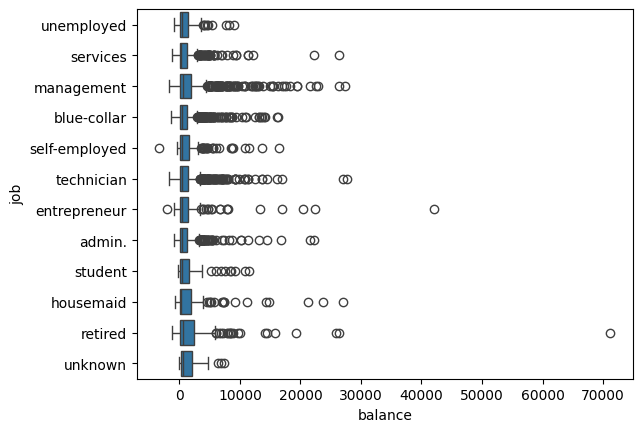

In [30]:
# Finding Outlier in the Balance Coloumn
sns.boxplot(data=df, x='balance', y='job')

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Correlation Coefficeent between the Variables</strong></h1>
</div>

<Axes: >

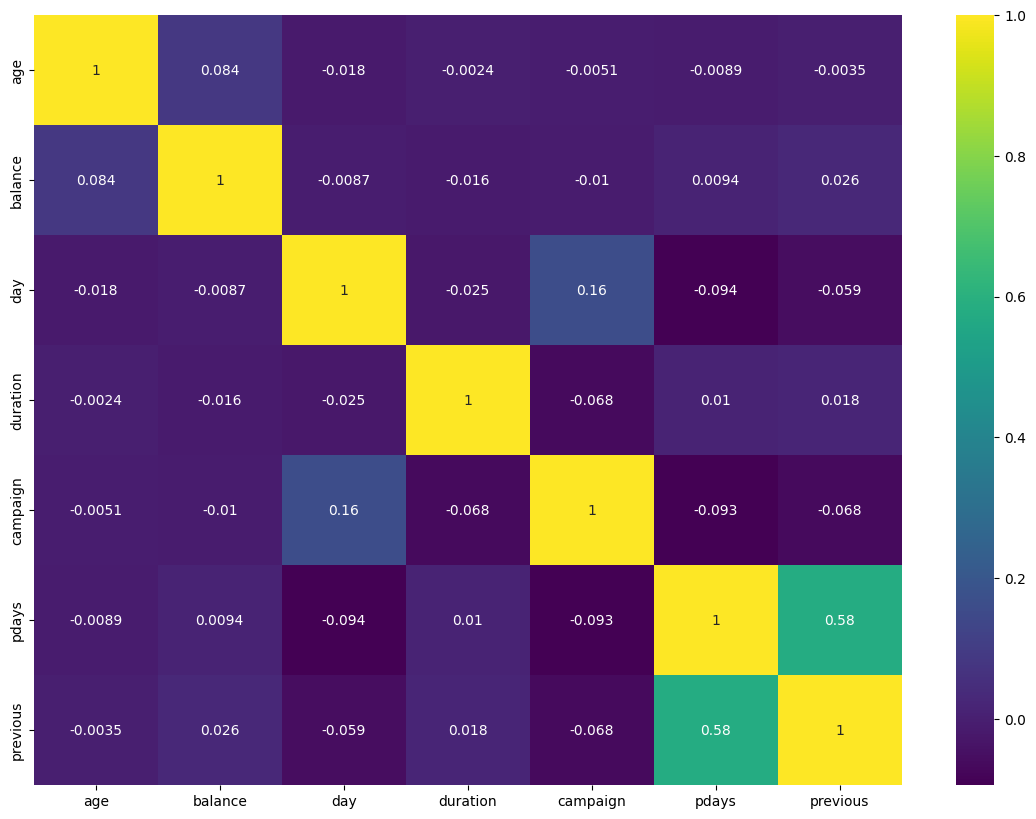

In [38]:
plt.figure(figsize = (14,10))
selected_coloumns = df[['age','balance', 'day', 'duration', 'campaign', 'pdays' , 'previous']]
correlation_matirx = selected_coloumns.corr()
sns.heatmap(correlation_matirx, annot=True, cmap='viridis')

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Apply Decision Tree Classifier</strong></h1>
</div>

### Convert the Categorical Variables into Numeric Value Using Lable Encoder

In [43]:
ordinal_encoder = OrdinalEncoder()
df[['poutcome',	'y', 'month', 'housing',	'loan',	'contact', 'job',	'marital',	'education',	'default']] = ordinal_encoder.fit_transform(df[['poutcome',	'y', 'month', 'housing',	'loan',	'contact', 'job',	'marital',	'education',	'default']])

### Split the Dataset Into Training and Testing 

In [51]:
X = df.drop(columns='y')
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .2, random_state = 42)
print(f'Training Set Size: {X_train.shape}')
print(f'Test set size:{X_test.shape}')

Training Set Size: (3616, 16)
Test set size:(905, 16)


## Apply Classifier to the Dataset

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.92      0.93       807
         1.0       0.42      0.47      0.44        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.68       905
weighted avg       0.88      0.87      0.88       905

Accuracy: 0.8718232044198895
Confusion Matrix:
 [[743  64]
 [ 52  46]]


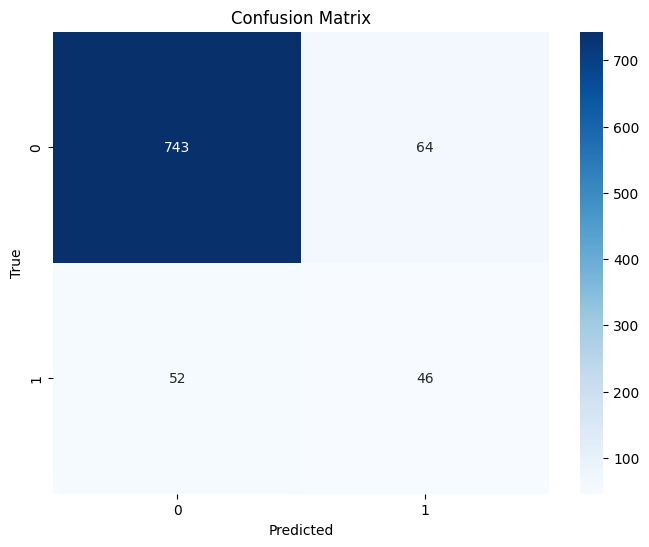

In [52]:
decision_tree = DecisionTreeClassifier(random_state = 42)
decision_tree.fit(X_train, y_train)

# Predict the test set
y_pred = decision_tree.predict(X_test)

#Evluate the model

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Above Results of the Decision Tree shows that the Model is Best Performing on that instances which has the most accourance in that seen the value is 'no' and Model Performance on the other class 'yes' is bad because the Number of instances in the dataset is less for that class. SO imporve the Results of the Model , Balance the dataset then Apply the Model to Get Best Results</strong></h1>
</div>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>The End</strong></h1>
</div>

<!-- 
#MuhammadAdeel 
#DataScientist 
#DataScienceEnthusiast 
#MPhilDataScience 
#Python 
#DataAnalysis 
#MachineLearning 
#Multan 
#Pakistan 
#GitHub 
#LinkedIn
#EDA
#cirrhossis
#datacleaning
-->